In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import numpy as np

df = pd.concat(pd.read_excel("Dados/201902.xlsx", sheet_name=None), ignore_index=True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast."})
df = df.drop("Lançamento", axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Data,Nr Frota,Placa,Produto,Tipo,Nr Litros,Valor Abast.
0,2019-02-01,78038,AJA-2563,DIESEL,Abast,100.270,349.95
1,2019-02-01,79434,ARV-7183,GASOLINA,Abast,37.580,153.71
2,2019-02-01,79460,BCD-6869,GASOLINA,Abast,41.570,170.03
3,2019-02-01,79458,BCD-6853,ETANOL,Abast,47.000,117.03
4,2019-02-01,79401,AHT-8827,GASOLINA,Abast,37.081,151.67
...,...,...,...,...,...,...,...
206,2019-02-28,79461,BCD-6871,ETANOL,Abast,49.780,148.84
207,2019-02-28,79454,BCC-4702,ETANOL,Abast,47.619,142.38
208,2019-02-28,79465,BCD-6526,ETANOL,Abast,37.800,113.02
209,2019-02-28,79506,AHR-1214,GASOLINA,Abast,36.311,148.51


In [2]:
df["Valor Abast."]

0      349.95
1      153.71
2      170.03
3      117.03
4      151.67
        ...  
206    148.84
207    142.38
208    113.02
209    148.51
210    123.07
Name: Valor Abast., Length: 211, dtype: float64

In [3]:
df.sort_values(by="Nr Litros")

,Data,Nr Frota,Placa,Produto,Tipo,Nr Litros,Valor Abast.
124,2019-02-18,93014,ATW-9372,GASOLINA,Abast,7.281,29.05
68,2019-02-11,79436,ASZ-6988,GASOLINA,Abast,8.090,33.10
17,2019-02-04,79436,ASZ-6988,GASOLINA,Abast,8.560,35.02
127,2019-02-18,79437,ASZ-7083,GASOLINA,Abast,8.590,34.27
177,2019-02-25,79436,ASZ-6988,GASOLINA,Abast,8.810,36.03
...,...,...,...,...,...,...,...
95,2019-02-14,78012,AKF-2842,DIESEL,Abast,125.640,425.93
155,2019-02-22,78012,AKF-2842,DIESEL,Abast,126.470,428.73
141,2019-02-19,78012,AKF-2842,DIESEL,Abast,128.201,434.60
13,2019-02-04,79473,AJU-6529,DIESEL,Abast,136.401,476.05


In [4]:
df[df["Nr Litros"] > df["Nr Litros"].mean()].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Produto,Tipo,Nr Litros,Valor Abast.
54,2019-02-08,78012,AKF-2842,DIESEL,Abast,139.481,486.80
13,2019-02-04,79473,AJU-6529,DIESEL,Abast,136.401,476.05
141,2019-02-19,78012,AKF-2842,DIESEL,Abast,128.201,434.60
155,2019-02-22,78012,AKF-2842,DIESEL,Abast,126.470,428.73
95,2019-02-14,78012,AKF-2842,DIESEL,Abast,125.640,425.93
...,...,...,...,...,...,...,...
16,2019-02-04,79446,ATL-9841,ETANOL,Abast,48.820,121.56
167,2019-02-22,79457,BCC-4713,GASOLINA,Abast,48.780,199.51
34,2019-02-05,79453,BCC-4701,ETANOL,Abast,48.598,121.01
103,2019-02-14,79457,BCC-4713,ETANOL,Abast,48.591,125.85


In [5]:
df[(df["Nr Litros"] > df["Nr Litros"].mean()) & (df["Produto"] == "GASOLINA")].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Produto,Tipo,Nr Litros,Valor Abast.
176,2019-02-25,79421,AJN-3792,GASOLINA,Abast,55.650,227.61
160,2019-02-22,79422,AJN-3794,GASOLINA,Abast,54.780,224.05
80,2019-02-12,79422,AJN-3794,GASOLINA,Abast,53.010,211.52
63,2019-02-11,92046,ALE-6725,GASOLINA,Abast,52.731,215.68
106,2019-02-14,79432,ARV-7425,GASOLINA,Abast,50.650,202.10
93,2019-02-13,79470,BCD-6851,GASOLINA,Abast,50.020,199.59
10,2019-02-03,79444,ATL-9834,GASOLINA,Abast,49.600,202.87
14,2019-02-04,77097,AAW-2629,GASOLINA,Abast,49.150,201.03
167,2019-02-22,79457,BCC-4713,GASOLINA,Abast,48.780,199.51


In [6]:
df["Produto"].value_counts()

ETANOL      94
GASOLINA    69
DIESEL      48
Name: Produto, dtype: int64

In [7]:
df["Produto"].value_counts(normalize=True)

ETANOL      0.445498
GASOLINA    0.327014
DIESEL      0.227488
Name: Produto, dtype: float64

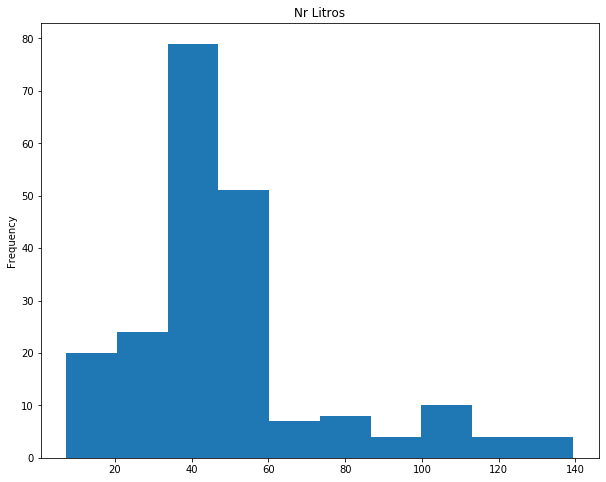

In [8]:
#Ploting
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
df["Nr Litros"].plot(kind='hist', title="Nr Litros")

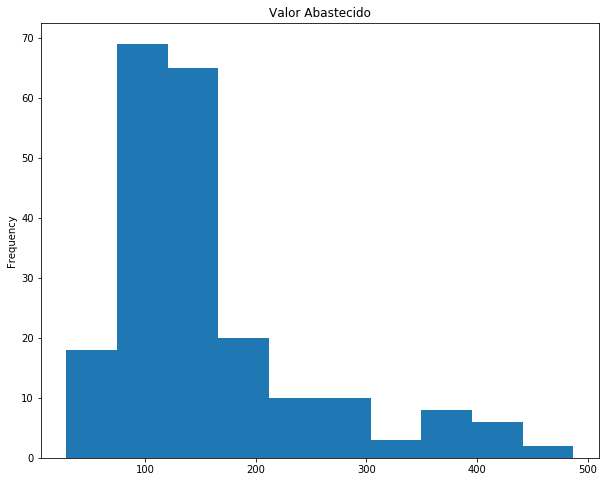

In [9]:
(df["Valor Abast."]).plot(kind='hist', title = "Valor Abastecido")

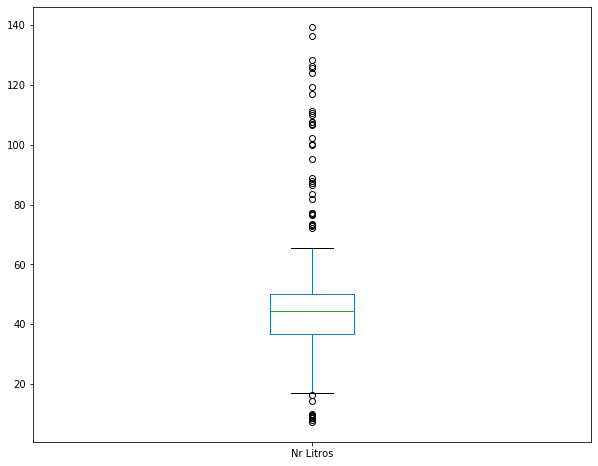

In [10]:
df["Nr Litros"].plot(kind="box")

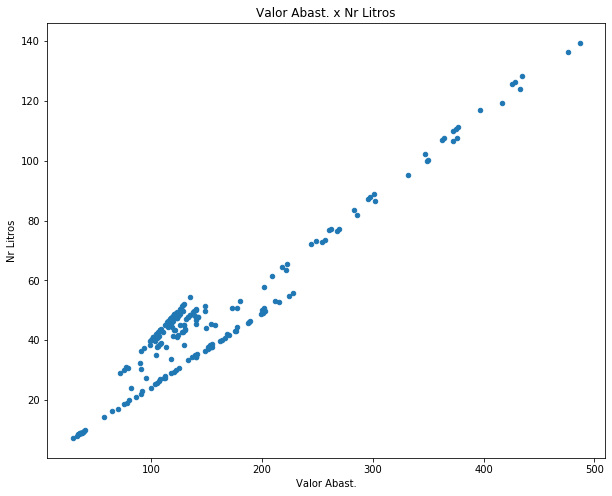

In [11]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

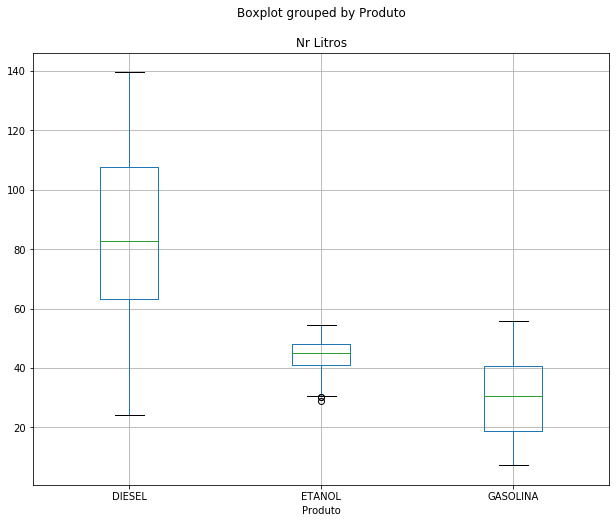

In [12]:
df.boxplot(column="Nr Litros", by="Produto")

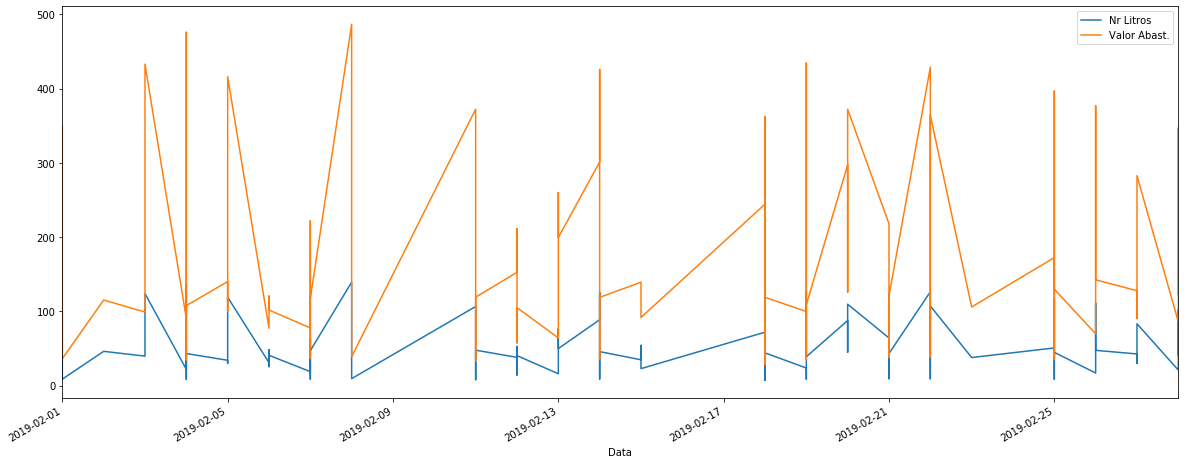

In [13]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

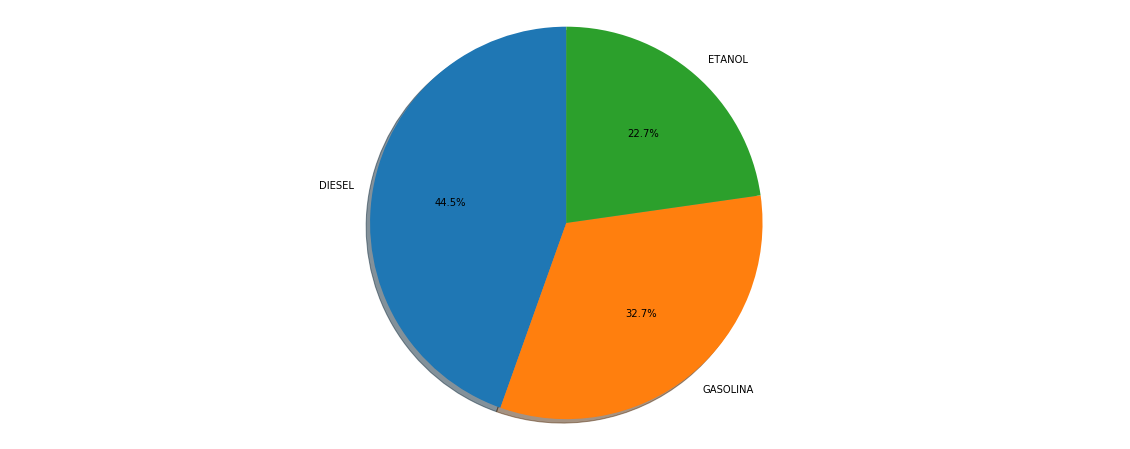

In [14]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

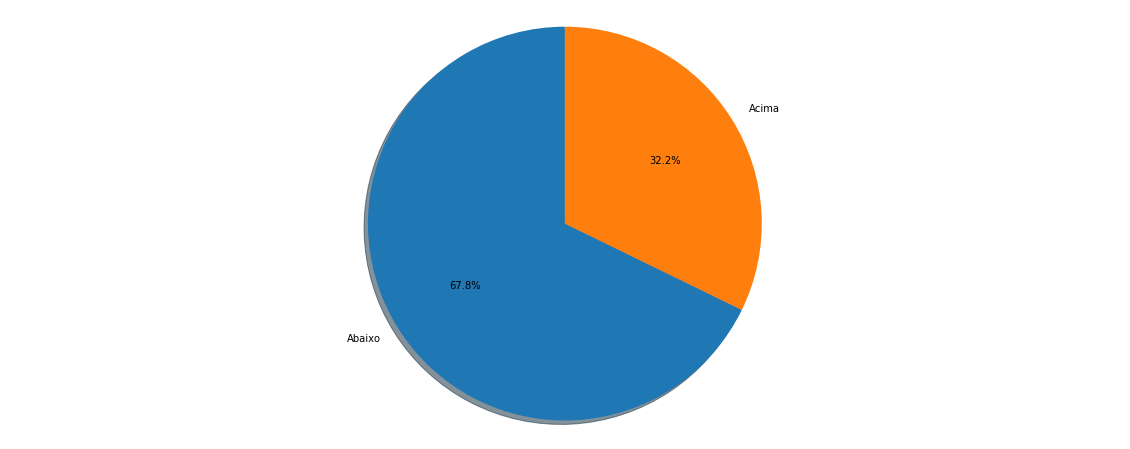

In [15]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

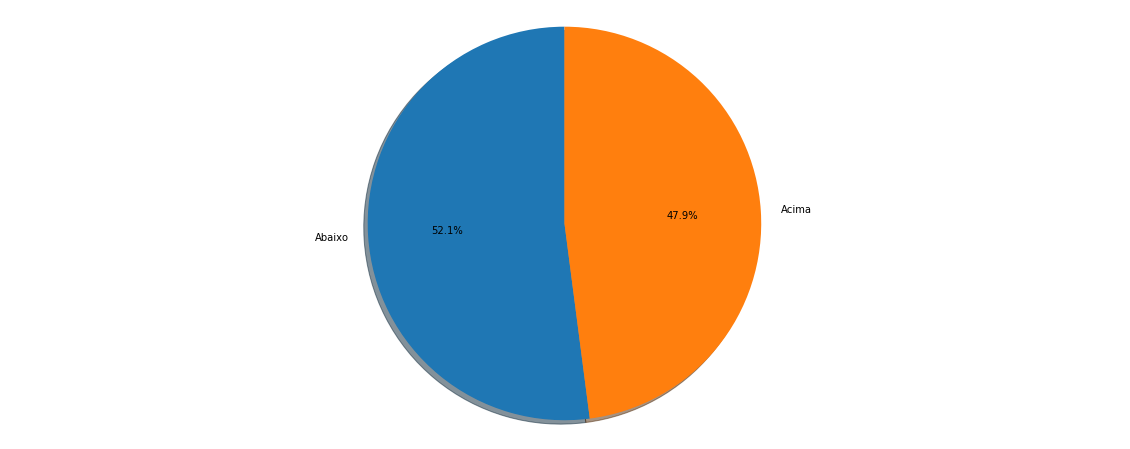

In [16]:
labels = ["Abaixo", "Acima"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

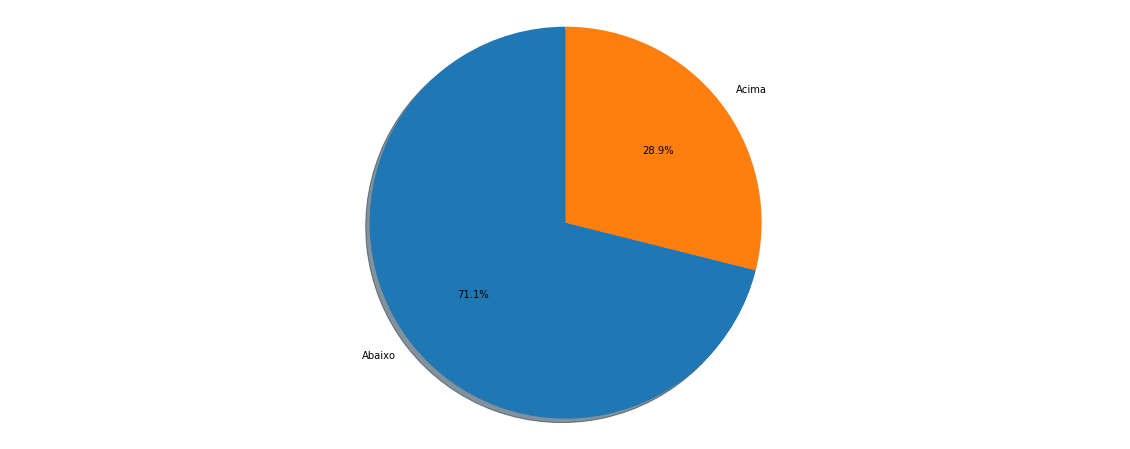

In [17]:
labels = ["Abaixo", "Acima"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

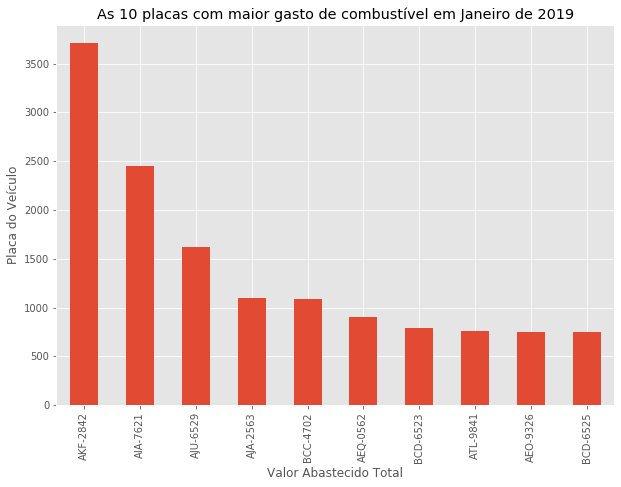

In [5]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 7))

#format the currency
#def currency(x, pos):
#    'The two args are the value and tick position'
#    if x >= 1000000:
#        return '${:1.1f}M'.format(x*1e-6)
#    return 'R${:1.1f}K'.format(x*1e-3)

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Placa", ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='As 10 placas com maior gasto de combustível em Janeiro de 2019', xlabel='Valor Abastecido Total', ylabel='Placa do Veículo')
#formatter = FuncFormatter(currency)
#ax.xaxis.set_major_formatter(formatter)
#add a line for the average
ax.axvline(x = avg, color='b', label='Média', linestyle='--', linewidth=1)

#annotate the values over the average
#for placa in [0, 1, 2]:
#    ax.text(100, placa, "Acima da média")
    
#hide the legend
ax.legend().set_visible(False)

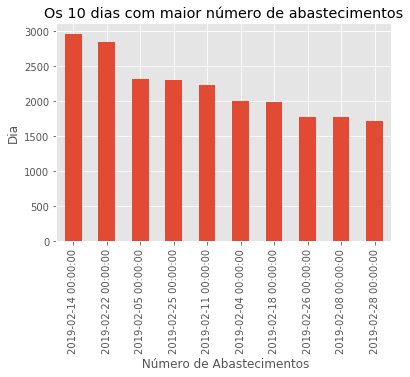

In [3]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Os 10 dias com maior número de abastecimentos', xlabel=' Número de Abastecimentos', ylabel='Dia')

#hide the legend
ax.legend().set_visible(False)

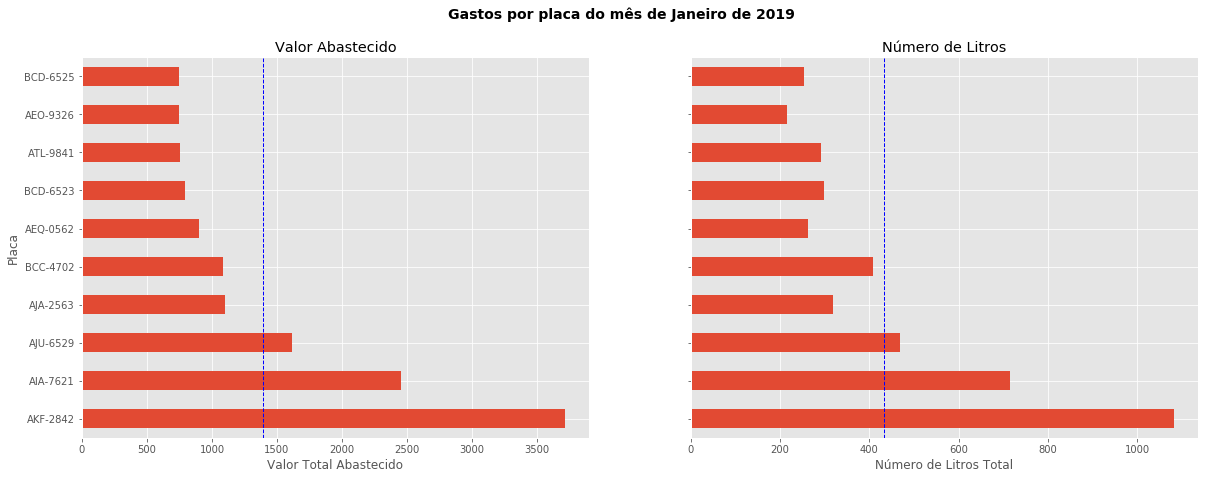

In [6]:
#get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

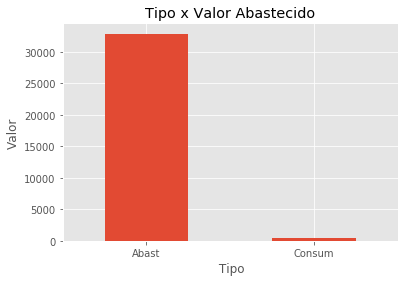

In [7]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Tipo')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Tipo': 'Tipo', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Tipo", rot = 0, ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Tipo x Valor Abastecido', xlabel=' Tipo', ylabel='Valor')

#hide the legend
ax.legend().set_visible(False)

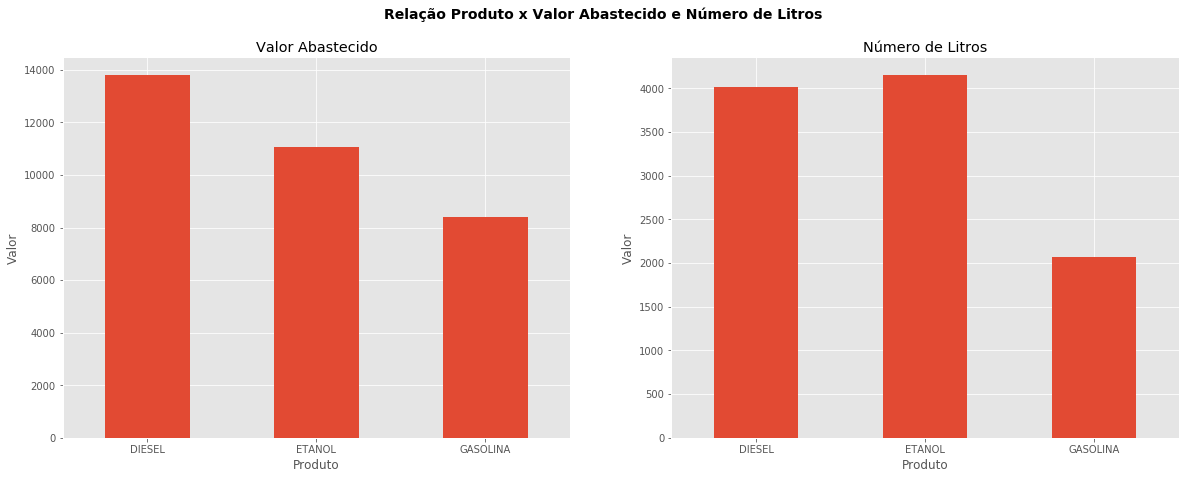

In [8]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

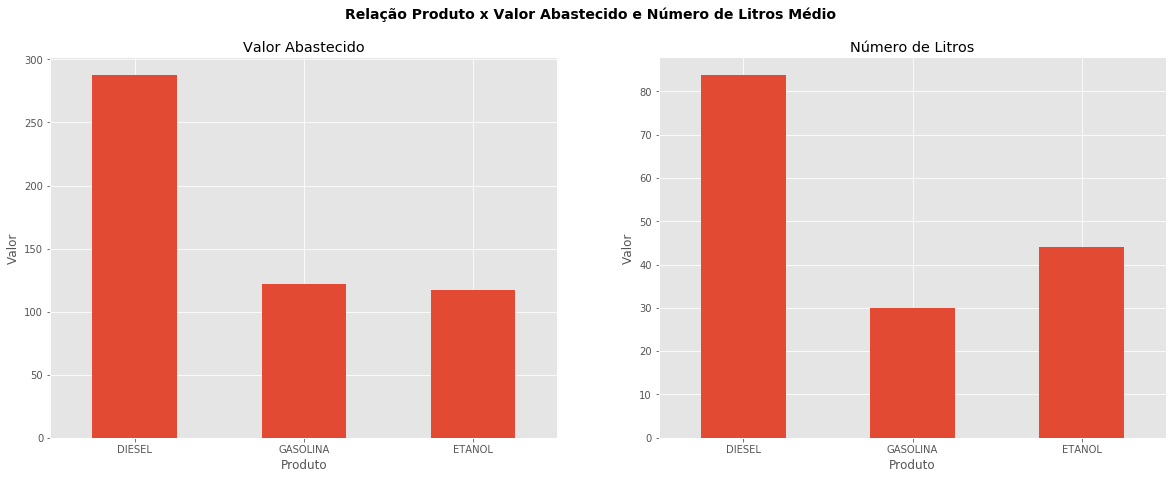

In [9]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'mean', 'Nr Litros': 'mean'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros Médio', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

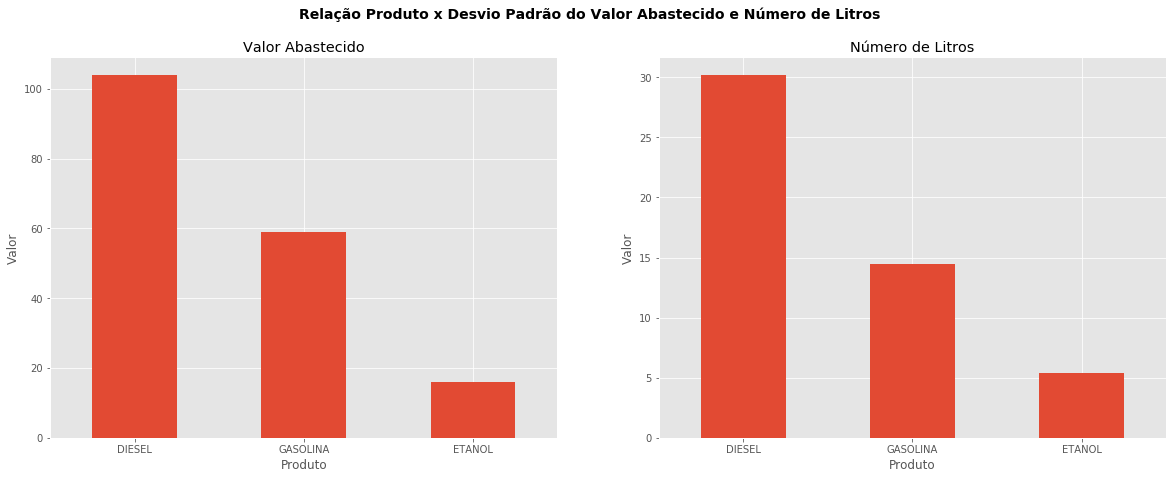

In [10]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'std', 'Nr Litros': 'std'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Desvio Padrão do Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)